In [96]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import tables

In [159]:
path = '../result/'
path_list=os.listdir(path)
E_total = []
taud_total = []
x_total = []
y_total = []
z_total = []
xl_total = []
yl_total = []
zl_total = []
x_truth = []
y_truth = []
z_truth = []

radius = []
mean = []
std = []
for filename in path_list:
    if os.path.splitext(filename)[1] == '.h5':
        #try:
        h = tables.open_file(os.path.join(path,filename),'r')
        recondata = h.root.Recon
        E = recondata[:]['E_sph']
        E_total = np.hstack((E_total, E))
        taud = recondata[:]['tau_d']
        taud_total = np.hstack((taud_total, taud))
        
        x = recondata[:]['x_sph']
        xt = recondata[:]['x_truth']
        xl = recondata[:]['x']

        xl = xl[~np.isnan(x)]
        xt = xt[~np.isnan(x)]
        x = x[~np.isnan(x)]

        xl_total = np.hstack((xl_total, xl))        
        x_truth = np.hstack((x_truth, xt))
        x_total = np.hstack((x_total, x))

        yl = recondata[:]['y']
        yt = recondata[:]['y_truth']
        y = recondata[:]['y_sph']

        yl = yl[~np.isnan(y)]        
        yt = yt[~np.isnan(y)]
        y = y[~np.isnan(y)]

        yl_total = np.hstack((yl_total, yl))
        y_truth = np.hstack((y_truth, yt))
        y_total = np.hstack((y_total, y))

        zl = recondata[:]['z']
        zt = recondata[:]['z_truth']        
        z = recondata[:]['z_sph']

        zl = zl[~np.isnan(z)]
        zt = zt[~np.isnan(z)]
        z = z[~np.isnan(z)]
        
        zl_total = np.hstack((zl_total, zl))
        z_total = np.hstack((z_total, z))
        z_truth = np.hstack((z_truth, zt))

        radius.append(zt[0])
        #print(zl)
        #print(zt)
        index = (~np.isnan(zl)) & (abs(zl)<1)
        mean.append((np.mean(np.abs(x-xt/1000)), np.mean(np.abs(y-yt/1000)), np.mean(np.abs(z-zt/1000)),\
                     np.mean(np.abs(xl[index]-xt[index]/1000)), np.mean(np.abs(yl[index]-yt[index]/1000)), np.mean(np.abs(zl[index]-zt[index]/1000))))
        std.append((np.std(x-xt/1000), np.std(y-yt/1000), np.std(z-zt/1000), \
                    np.std(xl[index]-xt[index]/1000), np.std(yl[index]-yt[index]/1000), np.std(zl[index]-zt[index]/1000)))
        #except:
        #    pass
        h.close()

Text(0.5,1,'By SH')

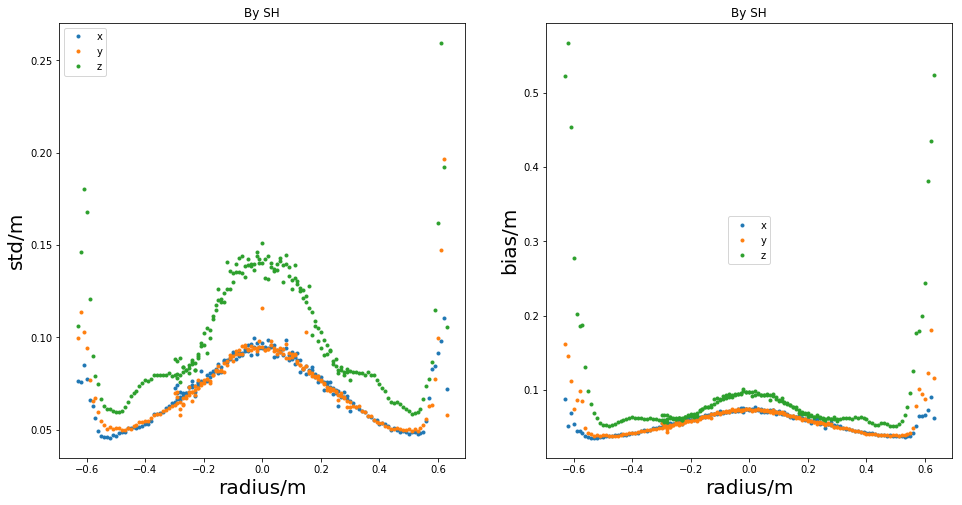

In [129]:
a = np.array(radius)/1000
b = np.array(mean)
c = np.array(std)
plt.figure(1, figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(a, c[:,0:3], '.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m',fontsize=20)
plt.ylabel('std/m',fontsize=20)
plt.title('By SH')
'''
plt.subplot(1,2,2)
plt.plot(a, c[:,3:], '.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m',fontsize=20)
plt.ylabel('std/m',fontsize=20)
plt.title('By naive ML')

plt.figure(2, figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(a, b[:,0:3], '.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m', fontsize=20)
plt.ylabel('bias/m', fontsize=20)
plt.title('By SH')
plt.subplot(1,2,2)
plt.plot(a, b[:,3:], '.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m',fontsize=20)
plt.ylabel('bias/m',fontsize=20)
plt.title('By Naive ML')
plt.show()
'''
plt.subplot(1,2,2)
plt.plot(a, b[:,0:3], '.')
plt.legend(['x','y','z'])
plt.xlabel('radius/m', fontsize=20)
plt.ylabel('bias/m', fontsize=20)
plt.title('By SH')


In [58]:
index = (~np.isnan(zl_total))

print(np.mean(zl_total[~np.isnan(zl_total)] - z_truth[~np.isnan(zl_total)]))
print(np.std(zl_total[~np.isnan(zl_total)] - z_truth[~np.isnan(zl_total)]))

-25.772169594640232
332.8932368616735


In [54]:
h = tables.open_file('../result/1.2MeV/calib+0.01.h5','r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']
xl = recondata[:]['x']
                     



OSError: ``../result/1.2MeV/calib+0.01.h5`` does not exist

/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


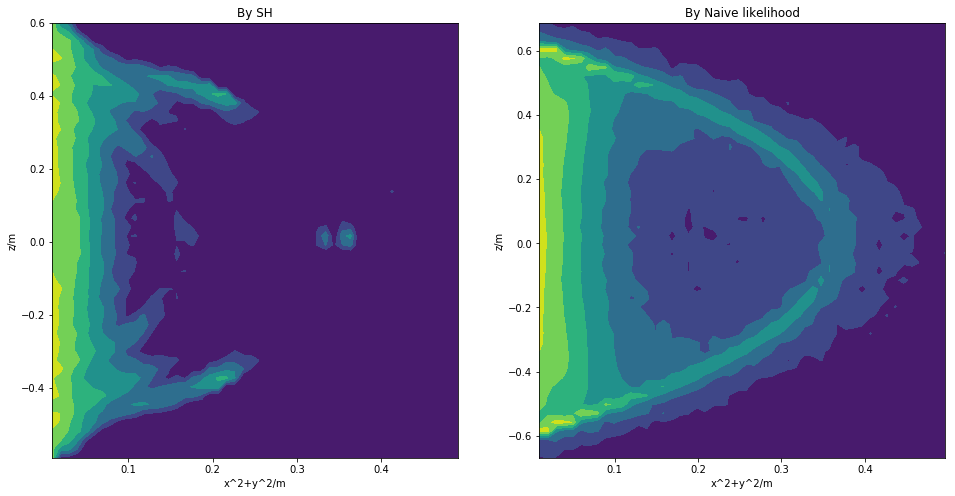

In [157]:
plt.figure(figsize=(16,8))
radius = x_total**2+y_total**2 + z_total**2
index = (~np.isnan(radius)) & (np.abs(radius)<0.5)
radius = x_total[index]**2+y_total[index]**2
plt.subplot(1,2,1)
H2, xedges, yedges = np.histogram2d(radius,z_total[index], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H2)+1))
plt.xlabel('x^2+y^2/m')
plt.ylabel('z/m')
plt.title('By SH')
radius = xl_total**2+yl_total**2 + zl_total**2
index = (~np.isnan(radius)) & (np.abs(radius)<0.5)
plt.subplot(1,2,2)
radius = xl_total[index]**2+yl_total[index]**2
H2, xedges, yedges = np.histogram2d(radius,zl_total[index], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H2)+1))
plt.xlabel('x^2+y^2/m')
plt.ylabel('z/m')
plt.title('By Naive likelihood')
plt.show()

In [15]:
print(x)
print(xl)
print(xt)

[-0.0711   0.07947 -0.126   -0.06415]
[-0.1095  0.1048 -0.1288 -0.0692]
[0. 0. 0. 0.]


/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


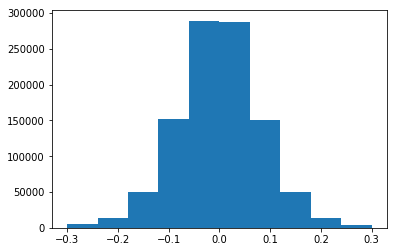

In [101]:
plt.hist(xl_total[(x_truth==0) & (~np.isnan(xl_total)) & (np.abs(xl_total)<0.3)])
plt.show()

In [105]:
np.sum(x_truth==0)

1033644

In [119]:
print(yl_total)

[ 0.04165649  0.03927612  0.00971985 ... -0.5234375   0.00544357
  0.55175781]


In [118]:
print(y_truth)

[   2.    2.    2. ... -126. -126. -126.]


In [40]:
def ReadPMT():
    f = open(r"../PMT1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos

PMT = ReadPMT()

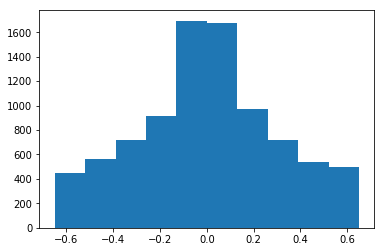

In [9]:
h = tables.open_file('../result/1.2MeV/calib+0.01.h5','r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']

xl = recondata[:]['x']
yl = recondata[:]['y']
zl = recondata[:]['z']

plt.hist(xl)
plt.show()

In [95]:
h = tables.open_file('../result/calib+0.59.h5','r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']
xl = recondata[:]['x']
yl = recondata[:]['y']
zl = recondata[:]['z']

plt.figure(figsize = (6,6))

r1 = x**2 + y**2
H1, xedges, yedges = np.histogram2d(r1, z, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H1)+1))
plt.xlabel('x^2+y^2:[m]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.title('SH recon')
plt.show()

r = xl**2+yl**2+zl**2
index = r<0.7**2
r2 = xl**2 + yl**2
H2, xedges, yedges = np.histogram2d(np.nan_to_num(r2[index]), np.nan_to_num(zl[index]), bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H2)+1))
plt.xlabel('x^2+y^2:[m]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.title('SH recon')
plt.show()

OSError: ``../result/calib+0.59.h5`` does not exist

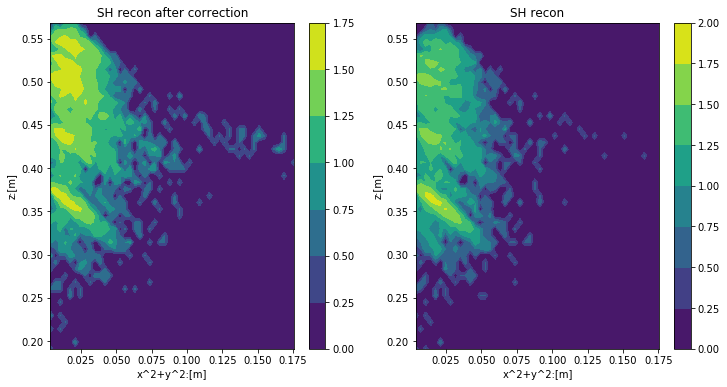

In [147]:
h = tables.open_file('../result/calib+0.55.h5','r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']
xl = recondata[:]['x']
h.close()
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
r1 = x**2 + y**2
H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z), bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
plt.xlabel('x^2+y^2:[m]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.title('SH recon after correction')

h = tables.open_file('../result/old/1.2MeV/calib+0.55.h5','r')
recondata = h.root.Recon
E = recondata[:]['E_sph']
taud = recondata[:]['tau_d']
x = recondata[:]['x_sph']
xt = recondata[:]['x_truth']
y = recondata[:]['y_sph']
yt = recondata[:]['y_truth']
z = recondata[:]['z_sph']
zt = recondata[:]['z_truth']
xl = recondata[:]['x']
h.close()
plt.subplot(1,2,2)
r1 = x**2 + y**2
H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z), bins=[xedges, yedges])
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.log(np.transpose(H1)+1)+1))
plt.xlabel('x^2+y^2:[m]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.title('SH recon')

plt.show()

In [122]:
c[:,2]

array([       nan,        nan, 0.09801425, 0.07476266,        nan,
       0.06141412, 0.07971139, 0.08153358, 0.09302015,        nan,
       0.0737384 , 0.06498998, 0.08676961, 0.1388594 , 0.1678583 ,
       0.08122146, 0.0809813 ,        nan,        nan, 0.08747914,
              nan, 0.09694727, 0.07992435, 0.25951025,        nan,
       0.12068076, 0.08671409, 0.14409645, 0.08385819, 0.14056407,
              nan, 0.0797042 , 0.1289286 , 0.09042468, 0.06217156,
       0.11501095, 0.12107509,        nan, 0.08895982, 0.08414578,
              nan,        nan, 0.16195329, 0.07374244, 0.07089731,
              nan,        nan,        nan, 0.10254221,        nan,
              nan,        nan, 0.11135324, 0.10109087,        nan,
              nan,        nan, 0.13595088,        nan, 0.07825334,
       0.07939065, 0.07617215, 0.07699414,        nan,        nan,
       0.06105462, 0.05951227, 0.06840791, 0.06475537,        nan,
              nan, 0.12805311, 0.08809826,        nan, 0.06007